# Project Overview

Sistem rekomendasi adalah garis pertahanan intuitif terhadap pilihan konsumen yang berlebihan. Mengingat pertumbuhan eksplosif informasi yang tersedia di website belanja online, pengguna sering disambut dengan banyaknya produk yang tawarkan. Dengan demikian, penyesuaian layanannya adalah strategi penting untuk memfasilitasi pengguna untuk membeli produk yang lebih baik.

Secara umum, daftar rekomendasi dihasilkan berdasarkan preferensi pengguna, fitur item, interaksi masa lalu item pengguna dan beberapa informasi lainnya. Sistem ini berperan penting dan tak terpisahkan dalam akses informasi untuk meningkatkan bisnis dan memfasilitasi proses pengambilan keputusan yang melekat di berbagai website belanja online.

Referensi :
* [Deep Learning based Recommender System: A Survey and New Perspectives](https://arxiv.org/pdf/1707.07435.pdf)
* [IJIRST - International Journal for Innovative Research in Science and Technology : Book Recomendation System](https://d1wqtxts1xzle7.cloudfront.net/38839415/IJIRSTV1I11135-with-cover-page-v2.pdf?Expires=1635526606&Signature=OC6kVPB3TytQm7lxnHJoKlHBTx6zf0bgqNhm4jrecRVPCbigc1DYMWwDPoVadTLDWi7l0LqcRj4HReJLsBCyWDlU-ziC8zIQAWdHc8F2PqeXfuXpJcZvyiw0i2ie0R2jyX6lSlkarBEzREi~02wAgD2y10l1cLcDm~rKV1PAx1o~qtMCYe0M7bsfUSAT-n8GD7fxogvEvJhjnN26S1KaYeOTQyyLo5QOfxT6w9Q5tAYMGzdBF-l93PxPdLyUxVztDhUY9E9Tlq1zGc2xBXNWhofh0aRFFAl6xipRe1ntBMB3xZ6atQr8iL4VL8kySLxbYrKqStjmxx4wdbIWDX22Tw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)



---



# Business Understanding

Sistem rekomendasi banyak digunakan untuk merekomendasikan produk kepada pengguna. Contohnya situs web penjualan buku online yang saat ini saling bersaing dengan berbagai cara. Sistem rekomendasi adalah salah satu cara yang terbaik untuk meningkatkan keuntungan penjualan dan memperluas jaringan pembeli.

Sistem rekomendasi ini dikembangkan menggunakan algoritma yang dapat menghasilkan berbagai buku yang diminati oleh pembeli, dengan membuat pilihan terbaik berdasarkan preferensi atau data buku yang telah dinilai oleh pengguna sebelumnya.

## Problem Statements

* Bagaimana  sistem rekomendasi menghasilkan sejumlah buku berdasarkan preferensi pengguna ?
* Berdasarkan pada data buku dan rating yang ada, bagaimana  sistem ini dapat merekomendasikan buku-buku yang mungkin disukai oleh pengguna lain?

## Goals

* Untuk merekomendasikan buku kepada pengguna yang dipersonalisasi sesuai dengan minatnya.

* Untuk menghasilkan sejumlah buku yang sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumnya.


## Solution Approach

Untuk menyelesaikan masalah ini saya menggunakan dua algoritma sistem rekomendasi sebagai solusi permasalahan yaitu **Content Based Filtering** dan **Collaborative Filtering**.

1. Content Based Filtering \
Teknik Content Based Filtering akan menyaring buku berdasarkan isi buku yang diminati pembeli. Lalu, setiap pengguna dikaitkan dengan pengklasifikasi sebagai profil. Pengklasifikasi mengambil item buku sebagai inputnya dan kemudian menyimpulkan apakah item tersebut disukai oleh pengguna terkait berdasarkan kontennya.    

2. Collaborative Filtering \
Pada tahap ini, sistem akan merekomendasikan sejumlah buku berdasarkan rating yang telah diberikan sebelumnya. Dan akan melihat ke set item yang telah dinilai oleh pengguna lalu menghitung seberapa mirip dengan item target. Dari data rating pengguna, akan mengidentifikasi buku apa saja yang mirip dan belum pernah dibeli oleh pengguna untuk direkomendasikan.

## Mengimpor Library yang Akan Digunakan

In [1]:
# pengolahan data
import os, sys
import pandas as pd
import numpy as np

# visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# pemodelan data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



---



# Data Understanding

Dataset yang digunakan adalah [Book Recommendation Dataset](https://www.kaggle.com/arashnic/book-recommendation-dataset)

## Menyiapkan Kredensial Akun Kaggle

In [2]:
os.environ['KAGGLE_USERNAME'] = 'rizalsihombing'
os.environ['KAGGLE_KEY'] = '4d09bb88e02a716fc7ea70c27ba33be1'

## Mengunduh Dataset

In [3]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 92% 22.0M/23.8M [00:00<00:00, 57.9MB/s]
100% 23.8M/23.8M [00:00<00:00, 68.4MB/s]


## Mengekstrak Dataset

In [4]:
!unzip book-recommendation-dataset.zip

Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


In [5]:
books = pd.read_csv('/content/Books.csv')
books.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Dapat dilihat dari Books.csv berjumlah **271360 baris** dan terdapat **7 variabel**, diantaranya adalah :

* ISBN : merupakan kode unik untuk pengidentifikasian buku.
* Book-Title : merupakan judul buku.
* Book-Author : merupakan pengarang atau penulis buku.
* Year-Of-Publication : merupakan tahun penerbitan buku.
* Publisher : merupakan penerbit buku.
* Image-URL-S : merupakan alamat suatu sumber gambar buku yang berukuran kecil, yang mengarah ke website Amazon.
* Image-URL-M : merupakan alamat suatu sumber gambar buku yang berukuran sedang, yang mengarah ke website Amazon.
* Image-URL-L : merupakan alamat suatu sumber gambar buku yang berukuran besar, yang mengarah ke website Amazon.

Namun pada tahap modeling nanti, variabel **Image-URL-S**, **Image-URL-M**, dan **Image-URL-L** tidak butuhkan dan akan dibuang.

In [6]:
ratings = pd.read_csv('/content/Ratings.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Dapat dilihat dari Ratings.csv berjumlah **1149780 baris** dan terdapat **3 variabel**, diantaranya adalah :

* User-ID : merupakan ID atau nomor unik pengguna.
* ISBN : merupakan kode unik untuk pengidentifikasian buku.
* Book-Rating : merupakan nilai peringkat buku yang diberikan oleh pengguna, dinyatakan dalam skala 1-10 (nilai yang lebih tinggi menunjukkan apresiasi yang lebih tinggi).

Setelah melihat dataframe ratings dan books telalu banyak, di sini saya hanya mengambil **10000** baris dari dataset books dan **5000** baris untuk rating dataset

In [7]:
books = books[:10000]
ratings = ratings[:5000]

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 10000 non-null  object
 1   Book-Title           10000 non-null  object
 2   Book-Author          10000 non-null  object
 3   Year-Of-Publication  10000 non-null  object
 4   Publisher            10000 non-null  object
 5   Image-URL-S          10000 non-null  object
 6   Image-URL-M          10000 non-null  object
 7   Image-URL-L          10000 non-null  object
dtypes: object(8)
memory usage: 625.1+ KB




---



# Content-Based Filtering

## Data Preparation

Mengubungkan dengan bagian variabel dataset dari **books**, **users**, dan **ratings**

In [9]:
books.columns = ['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication',
                 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']

ratings.columns = ['UserID', 'ISBN', 'BookRating']

### Books

Membuang 3 kolom terakhir yang berisi URL gambar karena tidak akan diperlukan. Yaitu :
* Image-URL-S 
* Image-URL-M 
* Image-URL-L 

In [10]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Mengecek kembali dataset buku

In [11]:
books.dtypes

ISBN                 object
BookTitle            object
BookAuthor           object
YearOfPublication    object
Publisher            object
dtype: object

In [12]:
books.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


Memeriksa nilai yang kosong pada dataset books

In [13]:
books.isnull().sum()

ISBN                 0
BookTitle            0
BookAuthor           0
YearOfPublication    0
Publisher            0
dtype: int64

### Ratings

Memeriksa dataset Ratings.

In [14]:
ratings.BookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [15]:
ratings.head()

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Visualisasi Data Ratings.

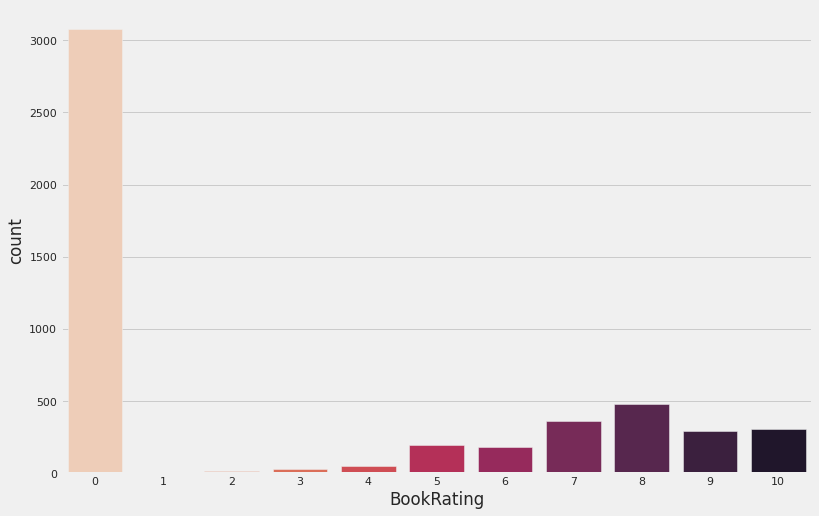

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings , x='BookRating', palette='rocket_r')

Pada visualisasi diagram batang diatas menunjukkan bahwa, rating buku yang lebih tinggi di antara pengguna adalah rating dengan nilai 0. Dan yang tertinggi selanjutnya adalah rating dengan nilai 8.

### Penggabungan Data

In [17]:
book_ISBN = books.ISBN.tolist()
book_Title = books.BookTitle.tolist()
book_Author = books.BookAuthor.tolist()
book_YearOfPublication = books.YearOfPublication.tolist()
book_Publisher = books.Publisher.tolist()

In [18]:
books_new = pd.DataFrame({
    'Book-ISBN': book_ISBN,
    'Book-Title': book_Title,
    'Book-Author': book_Author,
    'Book-YearOfPublication': book_YearOfPublication,
    'Book-Publisher': book_Publisher
})
books_new

,Book-ISBN,Book-Title,Book-Author,Book-YearOfPublication,Book-Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
9995,0380730774,Read This and Tell Me What It Says : Stories (...,A. Manette Ansay,1998,William Morrow
9996,0862418879,The Star Rover,Jack London,2000,Canongate Books
9997,340414645X,Die Keltennadel.,Patrick Dunne,2001,LÃ?Â¼bbe
9998,3442730988,Tod in der Datscha.,Anna Malyschewa,2003,btb




---



## Modeling and Result

Pada Content Based Filtering, akan menggunakan algoritma TF-IDF Vectorizer untuk membangun sistem rekomendasi berdasarkan penulis buku. TF-IDF yang memiliki fungsi untuk mengukur seberapa pentingnya suatu kata terhadap kata-kata lain dalam dokumen. Secara umum, algoritma akan menghitung skor untuk setiap kata untuk menandakan pentingnya dalam dokumen dan corpus.

* Kelebihan :
 * Model tidak memerlukan data apa pun tentang pengguna lain, membuatnya lebih mudah untuk menskalakan ke sejumlah besar pengguna.
 * Model dapat menangkap minat khusus pengguna, dan dapat merekomendasikan item khusus yang sangat sedikit yang diminati oleh pengguna lain.

* Kekurangan :
 * Karena representasi fitur item direkayasa sampai batas tertentu, teknik ini membutuhkan banyak pengetahuan domain.
 * Model hanya dapat membuat rekomendasi berdasarkan minat pengguna yang ada. Jadi, model memiliki kemampuan terbatas untuk memperluas minat pengguna yang ada.

In [19]:
tf = TfidfVectorizer()
 
tf.fit(books_new['Book-Author']) 
 
tf.get_feature_names()

['aaron',
 'aarsen',
 'abbey',
 'abbott',
 'abby',
 'abelar',
 'abraham',
 'abrahams',
 'abzug',
 'achebe',
 'ackerman',
 'ackroyd',
 'ad',
 'adam',
 'adamo',
 'adams',
 'adamson',
 'addis',
 'adele',
 'adeline',
 'adie',
 'adkins',
 'adler',
 'adrian',
 'adriana',
 'adrienne',
 'africa',
 'agatha',
 'agnes',
 'aguiar',
 'agustã',
 'agut',
 'ahdaf',
 'ahlberg',
 'ahne',
 'aidan',
 'aiden',
 'aiken',
 'aileen',
 'aimee',
 'ainslie',
 'akiba',
 'al',
 'alain',
 'alan',
 'alatas',
 'alba',
 'albanese',
 'albano',
 'albert',
 'alberts',
 'albom',
 'albright',
 'alcock',
 'alcorn',
 'alcott',
 'aldiss',
 'aldous',
 'aldrich',
 'aldrin',
 'alec',
 'aleister',
 'alejandro',
 'alejo',
 'aleksandr',
 'aleramo',
 'alers',
 'alesia',
 'alessandra',
 'alessandro',
 'alex',
 'alexa',
 'alexander',
 'alexandra',
 'alexandre',
 'alfie',
 'alfonsi',
 'alford',
 'alfred',
 'ali',
 'alice',
 'alicia',
 'alien',
 'alighieri',
 'alisa',
 'alison',
 'alistair',
 'alix',
 'aljean',
 'allan',
 'allen',
 'all

Tahap selanjutnya akan melakukan fit dan transformasi ke dalam matriks tfidf_matrix.

In [20]:
tfidf_matrix = tf.fit_transform(books_new['Book-Author']) 
 
tfidf_matrix.shape

(10000, 5575)

Dapat dilihat bahwa, hasil dari transformasi tfidf_matrix terdapat 10000 ukuran data buku dan 5575 nama penulis buku.

Selanjutnya saya akan menggunakan fungsi todense(), untuk menghasilkan vektor tf-idf dalam bentuk matriks

In [21]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Dataframe di bawah ini digunakan untuk melihat hasil matriks dari judul buku dengan penulis buku.

In [22]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns = tf.get_feature_names(),
    index = books_new['Book-Title']
).sample(10, axis=1,replace=True).sample(10, axis=0)

,alpers,lindbergh,greeley,dinah,anatoli,theresa,mac,sylvia,silva,parish
Book-Title,,,,,,,,,,
The Magick of the Tarot (The Llewellyn Practical Guides),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Black Notice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Star Country,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lo es : Una memoria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Positive Way to Change Your Life,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Irresistible Forces,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Unsung Hero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Food Lover's Handbook to the Southwest: Where to Find the Very Best Restaurants, Gourmet Shops, Outdoor Markets, Food Fiestas",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Boy in the Water,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Selanjutnya, saya akan menghitung derajat kesamaan (similarity degree) antar item yang direkomendasikan agar tidak terlalu jauh dari data pusat dengan teknik cosine similarity dari library sklearn.

In [23]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Dilanjutkan dengan membuat dataframe variabel cosine_sim_df dengan kolom berupa nama buku.

In [24]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=books_new['Book-Title'], columns=books_new['Book-Title'])

Berikut adalah fungsi untuk mendapatkan hasil rekomendasi sebanyak 5 buku, dengan kesamaan atribut dari penulis buku.

Atribut `argpartition` berguna untuk mengambil sejumlah nilai `k`, karena dalam fungsi menghasilkan sebanyak 5 rekomendasi tertinggi dari tingkat kesamaan yang berasal dari dataframe cosine_sim_df.

In [25]:
def book_recommendations(title, similarity_data=cosine_sim_df, items=books_new[['Book-Title', 'Book-Author']], k=5):
    index = similarity_data.loc[:,title].to_numpy().argpartition(range(-1,-k,-1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(title, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Sebagai contoh, saya akan mencari rekomendasi dari buku yang sudah dibaca. Misalnya buku **Not a Penny More 4** karya **Jeffrey Archer** yang diterbitkan pada tahun 1981.

In [26]:
readed_book = "Not a Penny More 4"
books_new[books_new['Book-Title'].eq(readed_book)]

,Book-ISBN,Book-Title,Book-Author,Book-YearOfPublication,Book-Publisher
9543,0449244288,Not a Penny More 4,Jeffrey Archer,1981,Fawcett Books


Dilanjutkan dengan menampilkan 5 rekomendasi dari buku dengan penulisnya adalah **Jeffrey Archer** 

In [27]:
recommendations = book_recommendations(readed_book)
recommendations

,Book-Title,Book-Author
0,Kane &amp; Abel,Jeffrey Archer
1,A TWIST IN THE TALE,Jeffrey Archer
2,Sons of Fortune (Ay Adult - Archer),Jeffrey Archer
3,The Eleventh Commandment,Jeffrey Archer
4,To Cut a Long Story Short,Jeffrey Archer


Dapat dilihat model memberikan 5 buku dengan penulis yang sama, yaitu **Jeffrey Archer**.



---



### Evaluation

Mengevaluasi metrik akurasi, dimana akurasi disini adalah :

Buku yang direkomendasikan sesuai dengan penulis buku / jumlah buku yang direkomendasikan.

Variabel `readed_book_new` merupakan buku yang pernah dibaca sebelumnya. \
Dan variabel `readed_book_author`  adalah buku dengan penulis dari buku yang pernah dibaca sebelumnya

In [28]:
readed_book_new = books[books.BookTitle == readed_book]
readed_book_author = readed_book_new.iloc[0]['BookAuthor']

Variabel `book_recommendation_authors` merupakan sebuah list yang terdiri dari para penulis buku-buku yang direkomendasikan oleh sistem ini

In [29]:
book_recommendation_authors = recommendations['Book-Author']

Kode di bawah ini merupakan proses manual, yang di mana akan mengecek setiap penulis dari buku yang direkomendasikan.Apabila sama, maka variabel `real_author` akan bertambah 1

In [30]:
real_author = 0
for i in range(5):
    if book_recommendation_authors[i] == readed_book_author:
        real_author+=1

Kode di bawah ini adalah akurasi dari model sistem rekomendasi yang telah dibuat, dimana jumlah buku yang direkomendasikan sesuai dengan penulis buku atau variabel real_author / jumlah buku yang direkomendasikan sebanyak 5.

In [31]:
acc = real_author / 5*100
print("Akurasi dari model ini adalah {}%".format(acc))

Akurasi dari model ini adalah 100.0%


Dapat dilihat bahwa akurasi pada model yang telah dibuat menunjukkan **akurasi 100%**.



---



# Collaborative Filtering

## Data Preparation

### Ratings

Mengubah UserID menjadi list tanpa nilai yang sama, lalu melakukan encoding UserID. Dilanjutkan dengan proses encoding angka ke UserId

In [32]:
user_ids = ratings['UserID'].unique().tolist()
print('List UserID: ', user_ids)
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('Encoded UserID : ', user_to_user_encoded)
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('Encoded angka ke UserID: ', user_encoded_to_user)

List UserID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

Mengubah ISBN menjadi list tanpa nilai yang sama, lalu melakukan encoding ISBN. Dilanjutkan dengan proses encoding angka ke ISBN

In [33]:
books_ids = ratings['ISBN'].unique().tolist()
print('List ISBN: ', books_ids)
 
book_to_book_encoded = {x: i for i, x in enumerate(books_ids)}
print('Encoded ISBN : ', book_to_book_encoded)

book_encoded_to_book = {i: x for i, x in enumerate(books_ids)}
print('Encoded angka ke ISBN: ', book_encoded_to_book)

List ISBN:  ['034545104X', '0155061224', '0446520802', '052165615X', '0521795028', '2080674722', '3257224281', '0600570967', '038550120X', '342310538', '0425115801', '0449006522', '0553561618', '055356451X', '0786013990', '0786014512', '0060517794', '0451192001', '0609801279', '0671537458', '0679776818', '0943066433', '1570231028', '1885408226', '0747558167', '3442437407', '033390804X', '3596218098', '0684867621', '0451166892', '8440682697', '034544003X', '0380000059', '0380711524', '0451167317', '0451454952', '0843920262', '3404122879', '3404182928', '3404611306', '342662429', '3426690179', '3442424216', '3442425573', '3453092007', '3453157745', '3453176944', '3453185137', '3453185323', '3453213025', '3453877241', '3492226604', '3517017442', '3596125006', 'B0000BLD7X', 'N3453124715', '9029716894', '9057868059', '0140279091', '0553572369', '0571058086', '3499230933', '3596151465', '0099543818', '3404147723', '3423111321', '3442136644', '3492232000', '8434811634', '8484330478', '8484332

Memasukkan hasil angka encoding user ke dataframe ratings dengan nama kolom Users. Dan memasukkan hasil angka encoding ISBN ke dataframe ratings dengan nama kolom Books.

In [34]:
ratings['Users'] = ratings['UserID'].map(user_to_user_encoded)
ratings['Books'] = ratings['ISBN'].map(book_to_book_encoded)

In [35]:
num_users = len(user_encoded_to_user)
print(num_users)
num_book = len(book_encoded_to_book)
print(num_book)
ratings['BookRating'] = ratings['BookRating'].values.astype(np.float32)

min_rating = min(ratings['BookRating'])
max_rating = max(ratings['BookRating'])
 
print('Jumlah dari pengguna: {}, Jumlah dari buku: {}, Rating minimal: {}, Rating maksimal: {}'.format(
    num_users, num_book, min_rating, max_rating
))

679
4688
Jumlah dari pengguna: 679, Jumlah dari buku: 4688, Rating minimal: 0.0, Rating maksimal: 10.0


Mengacak datanya agar distribusinya menjadi random.

In [36]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,UserID,ISBN,BookRating,Users,Books
1501,277427,0201000822,10.0,255,1470
2586,277639,0453008739,0.0,335,2487
2653,277639,0671509144,0.0,335,2550
1055,277187,0553281089,0.0,170,1041
705,276964,0886774829,8.0,96,696
...,...,...,...,...,...
4426,278418,0061091464,0.0,678,4127
466,276925,3775713328,0.0,80,461
3092,277928,0937247065,7.0,476,2935
3772,278159,0385318073,5.0,574,3549


Membagi data latih dan data validasi dengan komposisi 80:20.

In [37]:
x = ratings[['Users', 'Books']].values
 
y = ratings['BookRating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.80 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 255 1470]
 [ 335 2487]
 [ 335 2550]
 ...
 [ 476 2935]
 [ 574 3549]
 [ 139  850]] [1.  0.  0.  ... 0.7 0.5 0.5]




---



## Modeling and Result

Diawal, akan melakukan proses embedding terhadap data user dan buku. Selanjutnya, lakukan operasi perkalian dot product antara embedding pengguna dan buku. Selain itu, kita juga dapat menambahkan bias untuk setiap pengguna dan buku. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid. Dilanjutkan dengan membuat class RecommenderNet dengan keras Model. Class RecommenderNet ini terinspirasi dari tutorial dalam situs Keras dengan beberapa adaptasi sesuai dengan kasusnya.

* Kelebihan :
 * Hanya berfokus pada konten dan tidak memberikan kemampuan beradaptasi apa pun pada preferensi dan aspek pengguna.
 *  Sistem ini hanya membutuhkan matriks umpan balik untuk melatih model faktorisasi matriks. Secara khusus, sistem tidak memerlukan fitur kontekstual.

* Kekurangan :
 * Sistem rekomendasi ini tidak dapat membuat penyematan dan mengkueri model untuk item yang merupakan barang baru.
 * Sulit untuk menyertakan fitur sampingan untuk kueri/item.

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [39]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.book_embedding = layers.Embedding( 
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    book_vector = self.book_embedding(inputs[:, 1])
    book_bias = self.book_bias(inputs[:, 1]) 
 
    dot_user_resto = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_resto + user_bias + book_bias
    
    return tf.nn.sigmoid(x)

Selanjutnya, melakukan proses compile terhadap model menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

In [40]:
model = RecommenderNet(num_users, num_book, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Proses training.

In [41]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
800/800 [==============================] - 8s 7ms/step - loss: 0.6607 - root_mean_squared_error: 0.4185 - val_loss: 0.6373 - val_root_mean_squared_error: 0.4045
Epoch 2/50
800/800 [==============================] - 6s 7ms/step - loss: 0.5691 - root_mean_squared_error: 0.3643 - val_loss: 0.6085 - val_root_mean_squared_error: 0.3874
Epoch 3/50
800/800 [==============================] - 6s 7ms/step - loss: 0.5256 - root_mean_squared_error: 0.3422 - val_loss: 0.5929 - val_root_mean_squared_error: 0.3787
Epoch 4/50
800/800 [==============================] - 5s 7ms/step - loss: 0.5016 - root_mean_squared_error: 0.3278 - val_loss: 0.5786 - val_root_mean_squared_error: 0.3709
Epoch 5/50
800/800 [==============================] - 5s 7ms/step - loss: 0.4784 - root_mean_squared_error: 0.3130 - val_loss: 0.5667 - val_root_mean_squared_error: 0.3649
Epoch 6/50
800/800 [==============================] - 5s 7ms/step - loss: 0.4554 - root_mean_squared_error: 0.2988 - val_loss: 0.5577 - val_

### Visualisasi Metrik

Visualisasi proses hasil latihan dari data, evaluasi metrik yang digunakan adalah RMSE.

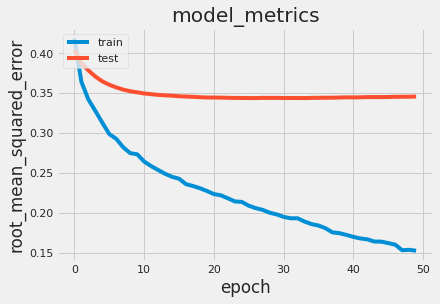

In [42]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Mendapatkan Hasil Rekomendasi Buku

In [43]:
books_df = books
ratings_df = ratings

In [44]:
ratings_df

,UserID,ISBN,BookRating,Users,Books
1501,277427,0201000822,10.0,255,1470
2586,277639,0453008739,0.0,335,2487
2653,277639,0671509144,0.0,335,2550
1055,277187,0553281089,0.0,170,1041
705,276964,0886774829,8.0,96,696
...,...,...,...,...,...
4426,278418,0061091464,0.0,678,4127
466,276925,3775713328,0.0,80,461
3092,277928,0937247065,7.0,476,2935
3772,278159,0385318073,5.0,574,3549


Selanjutnya akan mengambil sampel Users secara acak dari dataset rating. Dari User ini kita perlu mengetahui buku apa saja yang pernah dibaca sebelumnya, dan buku apa saja yang belum pernah dibaca. Sehingga model akan dapat merekomendasikan buku yang belum pernah dibaca.

In [45]:
user_id = ratings_df.UserID.sample(1).iloc[0]
book_readed = ratings_df[ratings_df.UserID == user_id]
 
book_not_readed = books_df[~books_df['ISBN'].isin(book_readed.ISBN.values)]['ISBN'] 
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_readed = [[book_to_book_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

Proses yang akan memperoleh rekomendasi 10 buku dari pengguna.

In [46]:
Ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = Ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_readed[x][0]) for x in top_ratings_indices
]
 
print('Menampilkan rekomendasi untuk User: {}'.format(user_id))
print('===' * 9)
print('Buku dengan rating tertinggi dari User')
print('----' * 8)
 
top_books_recommended = (
    book_readed.sort_values(
        by = 'BookRating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
books_row = books_df[books_df['ISBN'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row.BookTitle, ':', row.BookAuthor)
 
print('----' * 8)
print('Top 10 - Rekomendasi Buku untuk User')
print('----' * 8)
 
recommended_books = books_df[books_df['ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.BookTitle, ':', row.BookAuthor)

Menampilkan rekomendasi untuk User: 278131
Buku dengan rating tertinggi dari User
--------------------------------
Five Quarters of the Orange : Joanne Harris
--------------------------------
Top 10 - Rekomendasi Buku untuk User
--------------------------------
To Kill a Mockingbird : Harper Lee
Life of Pi : Yann Martel
Lord of the Flies : William Gerald Golding
The King of Torts : JOHN GRISHAM
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times : James Finn Garner
The Door into Summer : Robert A. Heinlein
Die zweite Haut. : Dean Koontz
I Am Legend : Richard Matheson
The Watsons Go to Birmingham - 1963 (Yearling Newbery) : CHRISTOPHER PAUL CURTIS
Last Man Standing : David Baldacci


Referensi :
* [Dicoding - Model Development dengan Content Based Filtering](https://www.dicoding.com/academies/319/tutorials/19657)
* [Dicoding - Model Development dengan Collaborative Filtering](https://www.dicoding.com/academies/319/tutorials/19662)
* https://www.kaggle.com/arashnic/recom-i-data-understanding-and-simple-recomm
* https://www.kaggle.com/hetulmehta/book-recommendation-system#notebook-container
* https://towardsdatascience.com/
* https://towardsdatascience.com/my-journey-to-building-book-recommendation-system-5ec959c41847